In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data= pd.read_csv('D1.csv')

In [2]:
data1 = data.copy(deep=True)

C:\Users\aryan\AppData\Local\Temp\ipykernel_2144\3557926254.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')


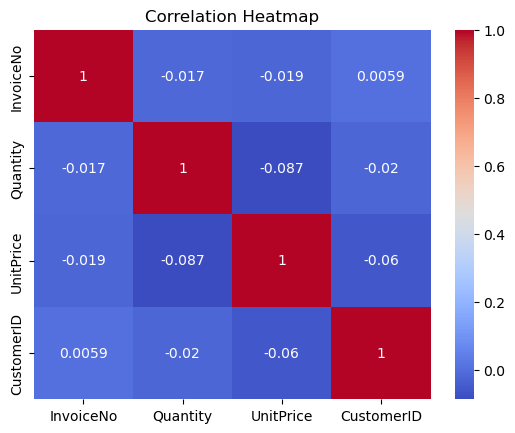

In [14]:
import seaborn as sns
sns.heatmap(data1.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [3]:
total_null_val = data1.isnull().mean()*100
print(total_null_val)

InvoiceNo       0.000000
StockCode       0.000000
Description     2.990388
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     20.266490
Country         0.000000
dtype: float64


In [4]:
data1['Description'].fillna('Na', inplace=True)

In [5]:
data1.isnull().mean()*100

InvoiceNo       0.00000
StockCode       0.00000
Description     0.00000
Quantity        0.00000
InvoiceDate     0.00000
UnitPrice       0.00000
CustomerID     20.26649
Country         0.00000
dtype: float64

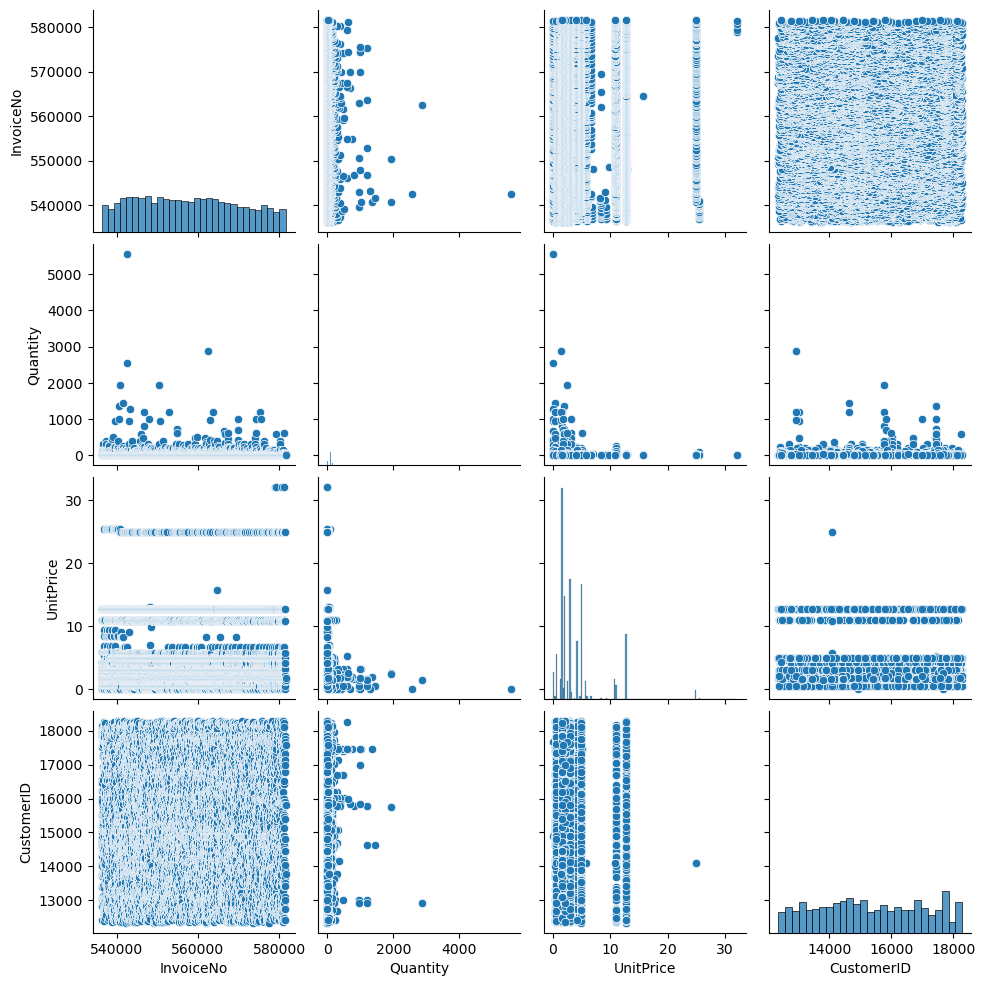

In [8]:
import seaborn as sns
sns.pairplot(data1)
plt.show()

In [6]:
transactions = data1.groupby(['InvoiceNo'])['Description'].apply(list)

Answer of Q1: 

The main pre-processing that we did on the dataset before building the association mining model was : 
- Found the number of null values in the dataset
- Replaced the Null values of Description column to "Na"
- created a column named transactions which contains the groupby'ed data of InvoiceNo and Description as in a list.

In [7]:
from apyori import apriori
transaction_list = list(transactions)
# Q2 a> What 'min_support' and 'min_confidence'...
results = list(apriori(transaction_list, min_support=0.01,min_confidence=0.3))

A2 (a) 

So in summary, the factors that led us to choose a 0.01 min_support and 0.3 min_confidence are the small data size, the retail business context, and an iterative approach to find the right levels.

In [63]:
print(results)

[RelationRecord(items=frozenset({'WHITE HANGING HEART T-LIGHT HOLDER', 'HEART OF WICKER SMALL'}), support=0.03849940921622686, ordered_statistics=[OrderedStatistic(items_base=frozenset({'HEART OF WICKER SMALL'}), items_add=frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}), confidence=0.32556203164029973, lift=1.4630123864331346)]), RelationRecord(items=frozenset({'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'}), support=0.08123276880661678, ordered_statistics=[OrderedStatistic(items_base=frozenset({'JUMBO BAG PINK POLKADOT'}), items_add=frozenset({'JUMBO BAG RED RETROSPOT'}), confidence=0.6773399014778325, lift=3.288271529354143), OrderedStatistic(items_base=frozenset({'JUMBO BAG RED RETROSPOT'}), items_add=frozenset({'JUMBO BAG PINK POLKADOT'}), confidence=0.3943594646271511, lift=3.288271529354143)]), RelationRecord(items=frozenset({'LUNCH BAG RED RETROSPOT', 'JUMBO BAG RED RETROSPOT'}), support=0.0570106341079165, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LUN

In [64]:
# Q2 b> Print the first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'WHITE HANGING HEART T-LIGHT HOLDER', 'HEART OF WICKER SMALL'}), support=0.03849940921622686, ordered_statistics=[OrderedStatistic(items_base=frozenset({'HEART OF WICKER SMALL'}), items_add=frozenset({'WHITE HANGING HEART T-LIGHT HOLDER'}), confidence=0.32556203164029973, lift=1.4630123864331346)]), RelationRecord(items=frozenset({'JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'}), support=0.08123276880661678, ordered_statistics=[OrderedStatistic(items_base=frozenset({'JUMBO BAG PINK POLKADOT'}), items_add=frozenset({'JUMBO BAG RED RETROSPOT'}), confidence=0.6773399014778325, lift=3.288271529354143), OrderedStatistic(items_base=frozenset({'JUMBO BAG RED RETROSPOT'}), items_add=frozenset({'JUMBO BAG PINK POLKADOT'}), confidence=0.3943594646271511, lift=3.288271529354143)]), RelationRecord(items=frozenset({'LUNCH BAG RED RETROSPOT', 'JUMBO BAG RED RETROSPOT'}), support=0.0570106341079165, ordered_statistics=[OrderedStatistic(items_base=frozenset({'LUN

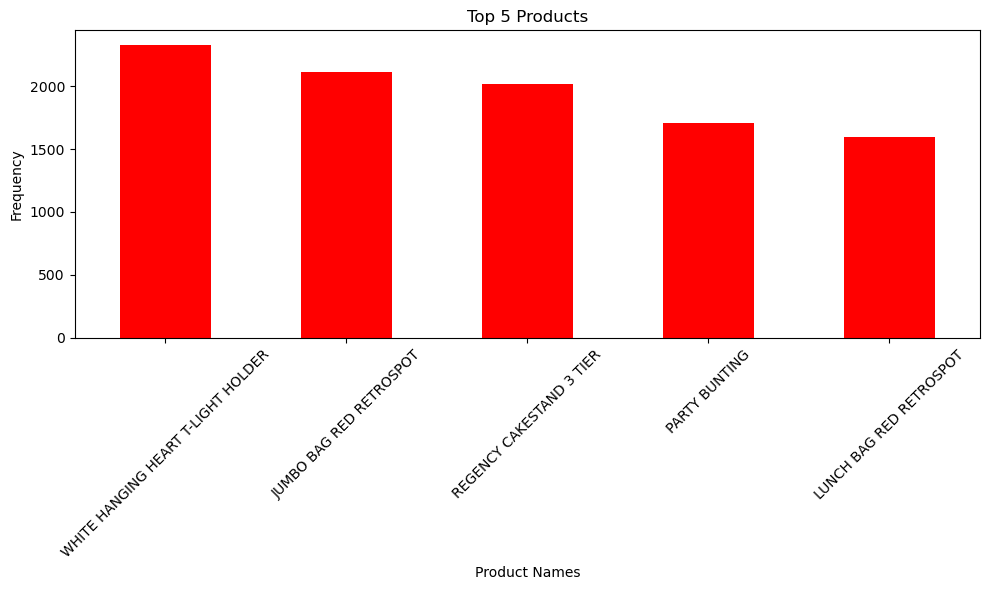

In [ ]:
import matplotlib.pyplot as plt

top_products = data1['Description'].value_counts().head(5)

plt.figure(figsize=(10, 6))
top_products.plot(kind='bar', color='red')

plt.xlabel('Product Names')
plt.ylabel('Frequency')
plt.title('Top 5 Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


A2 (b)

- Customers who buy HEART OF WICKER SMALL also tend to buy WHITE HANGING HEART T-LIGHT HOLDER 32.56% of the time.


- There is a strong association between JUMBO BAG PINK POLKADOT and JUMBO BAG RED RETROSPOT in both directions.


- Customers who buy LUNCH BAG RED RETROSPOT also buy JUMBO BAG RED RETROSPOT 37% of the time.


- There is a reciprocal relationship between LUNCH BAG RED RETROSPOT and LUNCH BAG BLACK SKULL.

- If a customer purchases NATURAL SLATE HEART CHALKBOARD, they will also buy WHITE HANGING HEART T-LIGHT HOLDER 33% of the time, which is 49% higher than expected.

In [67]:
def convert_to_df(results):
    rules = []

    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift])

    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support',
                                        'Confidence', 'Lift'])

result_df = convert_to_df(results)

print(result_df.head(20))

                                            Left_side  \
0                               HEART OF WICKER SMALL   
1                             JUMBO BAG PINK POLKADOT   
2                             JUMBO BAG RED RETROSPOT   
3                             LUNCH BAG RED RETROSPOT   
4                             LUNCH BAG  BLACK SKULL.   
5                             LUNCH BAG RED RETROSPOT   
6                     NATURAL SLATE HEART CHALKBOARD    
7       HEART OF WICKER SMALL,JUMBO BAG PINK POLKADOT   
8       HEART OF WICKER SMALL,JUMBO BAG RED RETROSPOT   
9       HEART OF WICKER SMALL,JUMBO BAG RED RETROSPOT   
10      HEART OF WICKER SMALL,LUNCH BAG RED RETROSPOT   
11      HEART OF WICKER SMALL,JUMBO BAG RED RETROSPOT   
12  NATURAL SLATE HEART CHALKBOARD ,HEART OF WICKE...   
13  NATURAL SLATE HEART CHALKBOARD ,JUMBO BAG RED ...   
14      HEART OF WICKER SMALL,JUMBO BAG RED RETROSPOT   
15  NATURAL SLATE HEART CHALKBOARD ,HEART OF WICKE...   
16  WHITE HANGING HEART T-LIGHT

In [68]:
result_df = list(apriori(transaction_list, min_support=0.01, min_confidence=0.1))
result_df = convert_to_df(result_df)
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(5))

                                             Left_side  \
331    LUNCH BAG  BLACK SKULL.,JUMBO BAG RED RETROSPOT   
330    LUNCH BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT   
332    LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPOT   
329    JUMBO BAG PINK POLKADOT,LUNCH BAG  BLACK SKULL.   
334  LUNCH BAG  BLACK SKULL.,JUMBO BAG PINK POLKADO...   

                                          Right_side   Support  Confidence  \
331  LUNCH BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT  0.012308    0.332447   
330  JUMBO BAG RED RETROSPOT,LUNCH BAG  BLACK SKULL.  0.012308    0.386997   
332  JUMBO BAG PINK POLKADOT,LUNCH BAG  BLACK SKULL.  0.012308    0.215889   
329  LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPOT  0.012308    0.488281   
334                          LUNCH BAG RED RETROSPOT  0.012308    0.690608   

          Lift  
331  10.453033  
330  10.453033  
332   8.564740  
329   8.564740  
334   4.484535  


In [69]:
results001 = list(apriori(transaction_list, min_support=0.01, min_confidence=0.1))
results001_df = convert_to_df(results001)
# sort all acquired rules descending by lift
results001_df = results001_df.sort_values(by='Lift', ascending=False)
print(results001_df.head(5))

                                             Left_side  \
331    LUNCH BAG  BLACK SKULL.,JUMBO BAG RED RETROSPOT   
330    LUNCH BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT   
332    LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPOT   
329    JUMBO BAG PINK POLKADOT,LUNCH BAG  BLACK SKULL.   
334  LUNCH BAG  BLACK SKULL.,JUMBO BAG PINK POLKADO...   

                                          Right_side   Support  Confidence  \
331  LUNCH BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT  0.012308    0.332447   
330  JUMBO BAG RED RETROSPOT,LUNCH BAG  BLACK SKULL.  0.012308    0.386997   
332  JUMBO BAG PINK POLKADOT,LUNCH BAG  BLACK SKULL.  0.012308    0.215889   
329  LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPOT  0.012308    0.488281   
334                          LUNCH BAG RED RETROSPOT  0.012308    0.690608   

          Lift  
331  10.453033  
330  10.453033  
332   8.564740  
329   8.564740  
334   4.484535  


In [70]:
result3 = list(apriori(transaction_list, min_support=0.01, min_confidence=0.1))
result3_df = convert_to_df(result3)
# sort all acquired rules descending by lift
task3= result3_df[result3_df['Left_side'] == 'JUMBO BAG PINK POLKADOT']
task3 = task3.sort_values(by='Lift', ascending=False)
print(task3.head(5))

                   Left_side  \
327  JUMBO BAG PINK POLKADOT   
154  JUMBO BAG PINK POLKADOT   
165  JUMBO BAG PINK POLKADOT   
159  JUMBO BAG PINK POLKADOT   
177  JUMBO BAG PINK POLKADOT   

                                            Right_side   Support  Confidence  \
327  LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPO...  0.012308    0.102627   
154    JUMBO BAG RED RETROSPOT,LUNCH BAG  BLACK SKULL.  0.017822    0.148604   
165  NATURAL SLATE HEART CHALKBOARD ,JUMBO BAG RED ...  0.014671    0.122332   
159    LUNCH BAG RED RETROSPOT,JUMBO BAG RED RETROSPOT  0.024518    0.204433   
177  SET OF 3 CAKE TINS PANTRY DESIGN ,JUMBO BAG RE...  0.012603    0.105090   

         Lift  
327  4.435244  
154  4.013896  
165  3.894673  
159  3.585884  
177  3.499335  


In [72]:
data1['multiple_description'] = data1.groupby(['InvoiceDate', 'InvoiceNo'])['Description'].transform('nunique') > 1
multiple_locations_df = data1[data1['multiple_description'] == True]
multiple_locations_df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,multiple_description
4,536378,22386,JUMBO BAG PINK POLKADOT,10,1/12/2010 9:37,1.95,14688.0,United Kingdom,True
5,536378,20725,LUNCH BAG RED RETROSPOT,10,1/12/2010 9:37,1.65,14688.0,United Kingdom,True
6,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,1/12/2010 9:37,0.42,14688.0,United Kingdom,True
7,536384,22457,NATURAL SLATE HEART CHALKBOARD,12,1/12/2010 9:53,2.95,18074.0,United Kingdom,True
8,536384,22469,HEART OF WICKER SMALL,40,1/12/2010 9:53,1.45,18074.0,United Kingdom,True
